# Machine Learning Titanic Courswork

## Courswork Task
“The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, **killing 1502 out of 2224 passengers and crew.** This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were **not enough lifeboats for the passengers and crew. Although there was some element of luck involved** in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.”

For this assignment you will **analyse the Titanic dataset with regards to predicting what categories of passengers were likely to survive** the sinking of the ocean liner. You will be **using machine learning methods to predict** as accurate as possible from general information about passengers which **passengers survived the tragedy.**

### Experiments

Develop a complete analysis pipeline in a programming language / environment of your choice. 

The objective of the analysis is to predict survivors of the Titanic disaster from the given data as accurately as possible.

There are no limitations with regards to the modelling approach, that is, you are free to explore (and report) as many methods, and their results, as you wish. The minimum requirement though is that you analyse the dataset using the following two classifiers:
- Logistic regression classifier
- Random forest classifier

You will report the results of your experiments through prediction, that is, classification accuracies with regard to correctly predicted survival rates.

# Data Dictionary & General Setup
The data provided for this assignment has been split into a training set and a test set, this test test set is also the ground truth.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Pallet
sns.set_palette("pastel")

In [2]:
# Importing Datasets
test_df = pd.read_csv('testdata_with_groundTruth.csv')
train_df = pd.read_csv('train.csv')

## Test Data

### Overview

In [3]:
print("Test Data Dimensions <Rows, Cols>: " + str(test_df.shape))
test_df.head(5)

Test Data Dimensions <Rows, Cols>: (418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Quality
The 9 of the 12 columns are complete with no NaN's, Fare has one missing value, Age has 82 missing values and Cabin has 327 missing values. Age and Fare should be easy to impute based on other columns, but Cabin may be an issue and might not be worth imputing at all.

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


## Training Data

### Overview

In [5]:
print("Training Data Dimensions <Rows, Cols>: " + str(train_df.shape))
train_df.head(5)

Training Data Dimensions <Rows, Cols>: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quality
10 out of the 12 columns have no NaN values. Age has 177 missing values and Cabin has 687 missing values. Similarly to the test set, Age will be easy to impute but Cabin may be an issue.

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Dictionary

|Attribute |Description |Possible Values |
|----------|------------|----------------|
|Survived  |If they Survived or not|0 = no, 1 = yes|
|Pclass    |Class of the passengers ticket|1 = First, 2 = Second and 3 = Third|
|Name      |Name of Passenger, including Title|Mr John Doe (String)|
|Sex       |Gender|Male, Female|
|Age       |Age of the passenger| 50 (Int)|
|Sibsp     |Number of Siblings/Spouses Aboard|2 (int)|
|Parch     |Number of Parents/Children Aboard|2 (int)|
|Ticket    |Ticket Number|PC127321 (String, no form)|
|Fare      |Fare Passenger paind for ticket|120 (int)|
|Cabin     |Cabin than Passenger had, if they had one|C123 (String)|
|Embarked  |Location they Boarded the Titanic|C = Cherbourg; Q = Queenstown; S = Southampton|

# Graphical Understanding of the Features
In this section I will graphical represent the features in the training data to see if there is any correlation between the values of the feature and if they survived or not. Im this I will not look at PassengerId as it is has been added after the event for data management purposes, Name as this is most likely unique to an indivdual and an overall trend should not be visable and Ticket as this is unique to an individual and an overall trend should not be visible.

## Pclass
For the survivors, there is not a lot of difference between the 3 classes, but second class had the least survivors. For the perished, third class had over 3 times as many as fatalities as any other class. When comparing the number of individuals per class, you can see that first and second class have similar passenger numbers with similar passenger survived/perished, but third class had the highest number of passengers but also the highest proportion of people that perished.

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64


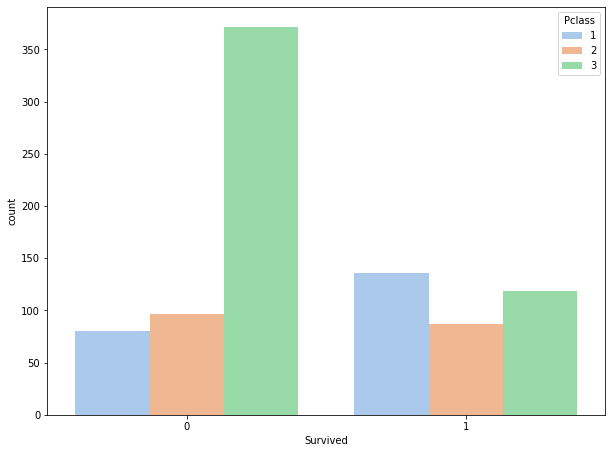

In [7]:
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'Survived', hue = 'Pclass', data = train_df)
print(train_df.groupby(['Pclass']).count().iloc[:,0])

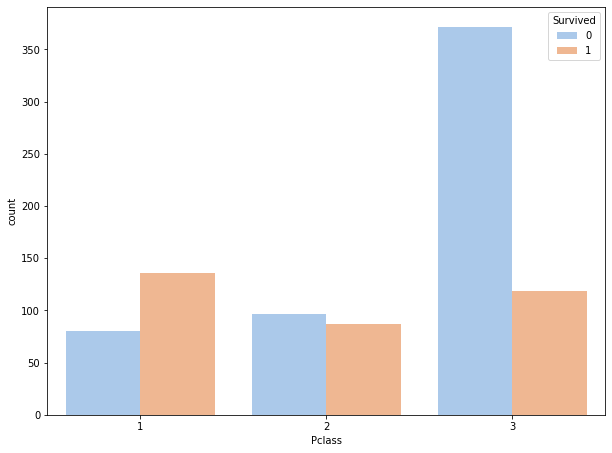

In [8]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x = 'Pclass', hue = 'Survived')

## Sex
When looking at Sex, it is clear that Males had the highest fatality rate.

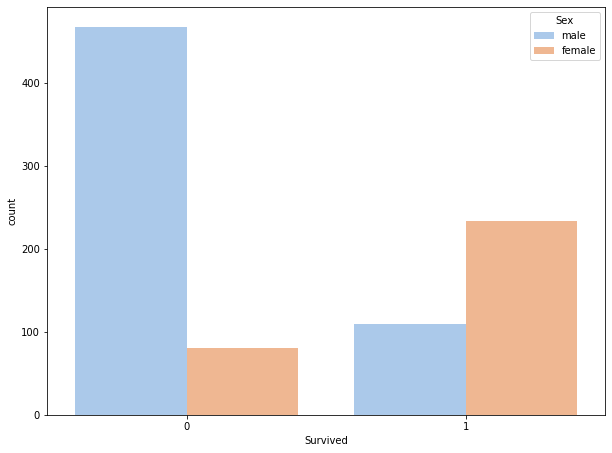

In [9]:
plt.figure(figsize = (10, 7.5))
sns.countplot(x = 'Survived', hue = 'Sex', data = train_df)

## Age
Children under 15 had the highest survivorship rate, with individuals aged 15 to 50 had a low chance of surviving. I suspect that Sex had a major role in determaning if you survived especially if you were over the age of 18.

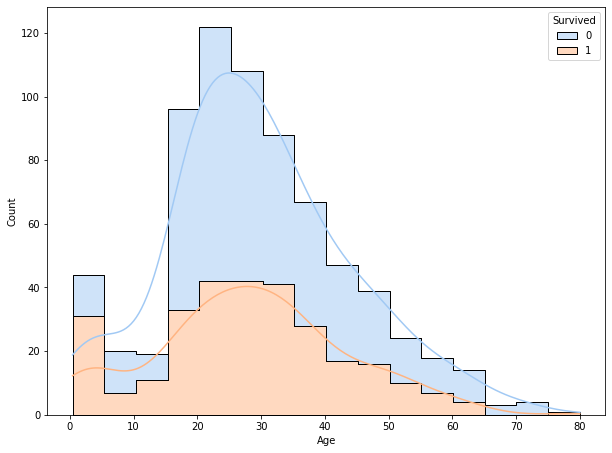

In [10]:
plt.figure(figsize = (10, 7.5))
sns.histplot(data = train_df, x="Age", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 16)

## SibSp
Lone passengers had the highest fatlity rate.

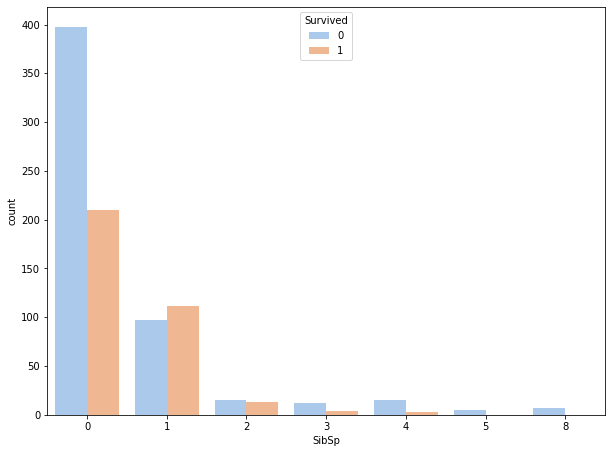

In [11]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x="SibSp", hue = "Survived")

## Parch
Lone passengers had the highest fatility rate, with people that travelled with family tended to have a higher level of survival.

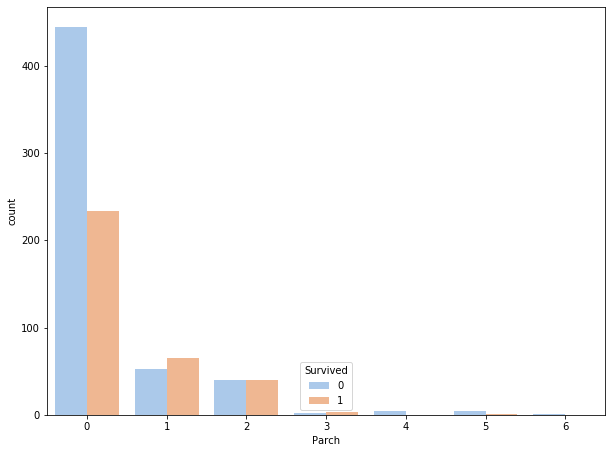

In [12]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x="Parch", hue = "Survived")

## Fare
The majority of individuals had a low fare price, this is inline with the majority of passengers travelled third class.

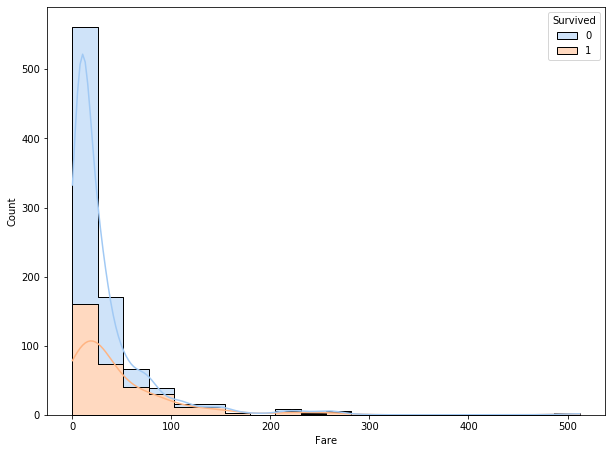

In [13]:
plt.figure(figsize = (10, 7.5))
sns.histplot(data = train_df, x="Fare", hue = "Survived"
             , multiple = "stack", element = "step", kde = True, bins = 20)

## Embarked
The majority of people got on the ship at Southhampton, and that port has a higher rate of death.

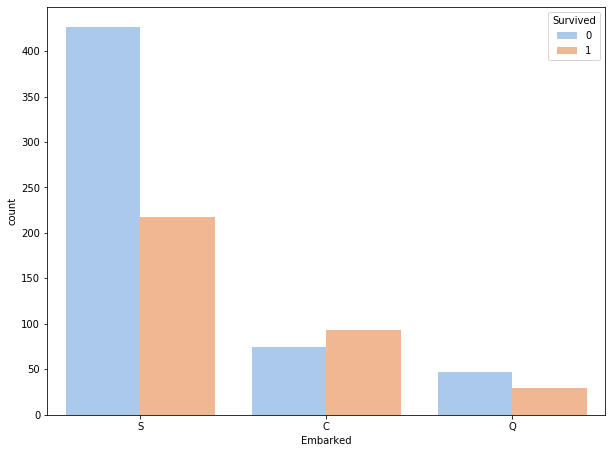

In [14]:
plt.figure(figsize = (10, 7.5))
sns.countplot(data = train_df, x="Embarked", hue = "Survived")

## Correlation Summary
Below is a correlation matrix between all the varibles, most notable the line comparing variables to Survived we can see that Pclass and Sex have some of the strongets correlations, these are negative correlations due to younger people having higher chance of survival and Female is assigned the numerical value 0.

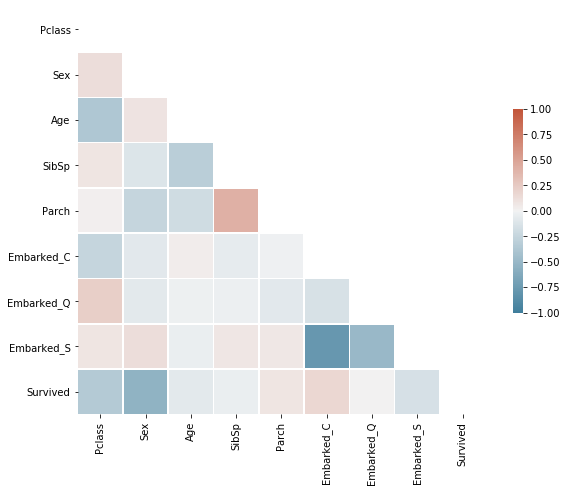

In [15]:
plt.figure(figsize = (10, 7.5))

scrap_train_df = train_df.copy()
scrap_train_df['Sex'] = train_df['Sex'].astype('category').cat.codes
scrap_train_df = pd.get_dummies(scrap_train_df, columns=['Embarked'])
corr = scrap_train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Feature Extraction
Some of the features are not compatable in there raw form to be put into a model but there still might be information there, I can engineer new features with the extracted information.

**Features to Extract:**
- Title from Name, could help impute Age more accurately. I will do this trough regex as from initial looking all titles are followed by a '.' .
- Family Size, There could be some relation to the size of the family and if they survived or not.
- Surname, to identify family members.
- Other members survived, this will be used as a "Look Forward Feature".

In [16]:
train_df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


**Proofing Engineering Title &  Pre-Work**

Finding out the spread of Titles across the datasets, I will make some titles that only occur a very small amount of times into more common titles to not pollute the machine learning models with too much finite information.

In [17]:
scrap_train_df = train_df.copy()
scrap_train_df['Title'] = scrap_train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
print(scrap_train_df.groupby(['Title']).count().iloc[:,0].sum())
scrap_train_df.groupby(['Title']).count().iloc[:,0]

891


Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

In [18]:
scrap_train_df = test_df.copy()
scrap_train_df['Title'] = scrap_train_df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
print(scrap_train_df.groupby(['Title']).count().iloc[:,0].sum())
scrap_train_df.groupby(['Title']).count().iloc[:,0]

418


Title
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
Name: PassengerId, dtype: int64

**Family Name Proof** 

TODO:Is this needed

In [19]:
scrap_train_df = train_df.copy()
scrap_train_df['FamilyName'] = scrap_train_df['Name'].str.extract(r'^([\w\-]+)', expand=True)
scrap_train_df.groupby(['FamilyName', 'Parch', 'SibSp']).count().reset_index()

,FamilyName,Parch,SibSp,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked
0,Abbing,0,0,1,1,1,1,1,1,1,1,0,1
1,Abbott,1,1,2,2,2,2,2,2,2,2,0,2
2,Abelson,0,1,2,2,2,2,2,2,2,2,0,2
3,Adahl,0,0,1,1,1,1,1,1,1,1,0,1
4,Adams,0,0,1,1,1,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,de,0,0,2,2,2,2,2,2,2,2,0,2
721,de,0,1,1,1,1,1,1,1,1,1,0,1
722,del,0,1,1,1,1,1,1,1,1,1,0,1
723,van,0,0,1,1,1,1,1,0,1,1,0,1


## Feature Engineering Functions

In [20]:
# Engineering Title
def engineer_title(df):
    """
    Engineering Title from name feature. Takes Titanic Dataframe with NO Missing Name Values. Extracts the Feature Title and Sets Makes some rare titles more common.
    """
    # Create Title
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)
    
    # Map Rare Titles Across
    title_map = {'Capt':'Mr', 'Col':'Mr', 'Countess':'Mrs', 'Don':'Mr', 'Jonkheer':'Mrs',
                'Lady':'Mrs', 'Major':'Mr', 'Mlle':'Mrs', 'Mme':'Mrs', 'Ms':'Miss', 'Sir':'Mr',
                'Dona':'Mrs'}
    df.replace({'Title': title_map}, inplace=True)
    return df

# Engineering Family Members
def engineer_family_members(df):
    """
    Takes the titanic dataframe with NO MISSING VALUES and creates a collumn for the number of family members.
    """
    df['FamilyMembers'] = df['Parch'] + df['SibSp'] + 1
    return df

# Engineer Family Name
def engineer_family_name(df):
    """
    Takes the Titanic dataframe with No Missing Values in the Name Column and produces a column Family Name.
    """
    scrap_train_df['FamilyName'] = scrap_train_df['Name'].str.extract(r'^([\w\-]+)', expand=True)
    return df


# Data Selection & Cleaning Pipeline
- Add the the Features Outlined Above.
- Feature Selection.
- Clean The Data by filling in missing values.

In [21]:
# Cleaner Function
def cleaner(df):
    """
    Takes the both titanic datasets and calls the feature engineering functions, then selects the features ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",
             "FamilyMembers", "Title", "Survived"]. With it then imputes the missing values from the Age, Fare and Embarked Features.
    """
    # Add Features
    df = engineer_family_members(df)
    df = engineer_title(df)
    
    # Feature Selection
    df = df[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked",
             "FamilyMembers", "Title", "Survived"]].copy()
    
    # Clean Embarked
    titles = df["Title"].unique()
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)
    # Clean Age
    # cond & val loop filler
    cond = []
    val = []
    for i in titles:
        cond.append(df.Title == i)
        val.append(round(df[(df.Title == i)].Age.mean()))
    df['Age'] = np.where(df['Age'].isnull(), np.select(cond, val), df['Age'])
    
    # Clean Fare
    from sklearn.impute import SimpleImputer
    imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    imp = imp.fit(df[['Fare']])
    df['Fare'] = imp.transform(df[['Fare']]).ravel()
    
    # Return Data
    return df

# Data Preperation Pipeline
The dataset has multiple variables that need work before being passed into the machine learning models. These variables are:
- Pclass - OneHot Encode - Pclass will most likely have an effect on the survival rate, but it needs to be OneHot encoded as the values [1,2,3] are categories without a linear relationship.
- Sex - OneHot Encode - This is a categorical text field that cannot be put into a model, so this will become 0 and 1.
- Embarked - OneHot Encoded - 3 potential letter values.
- Title - OneHot Encoded - Text field needs to be converted

**All Variables will be scaled**

In [22]:
def prepare(tr_df, te_df):
    # Join the datasets for a full encoding library can be fitted
    full_df = pd.concat([tr_df, te_df])
    full_df = full_df.iloc[:, :-1]
    # One Hot Encoding the Variables
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 6, 8])]
                           , remainder='passthrough')
    ct.fit(full_df)
    
    # Split Data & Transform
    X_train = ct.transform(tr_df.iloc[:, :-1])
    y_train = tr_df.iloc[:, -1]
    X_test = ct.transform(te_df.iloc[:, :-1])
    y_test = te_df.iloc[:, -1]
    
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    # Return Datasets
    return X_train, y_train, X_test, y_test

In [25]:
# Action Pipeline
train_df = cleaner(train_df)
test_df = cleaner(test_df)
X_train, y_train, X_test, y_test = prepare(train_df, test_df)